Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [82]:

NICKNAME = "underham2ter"

---

# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [83]:
import scipy.special as sp, scipy.integrate
from scipy import integrate
import numpy as np
import sys
from scipy.linalg import solve as ls
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,8)
import seaborn as sns
sns.set(font_scale=1, rc={'text.usetex' : True})
sns.set_palette(sns.color_palette("hls", 8))

plt.style.use('ggplot')

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [84]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = np.pi**(D/2) / sp.gamma(1+D/2)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

V(2) = pi*1.0
V(3) = pi*1.3333333333333335


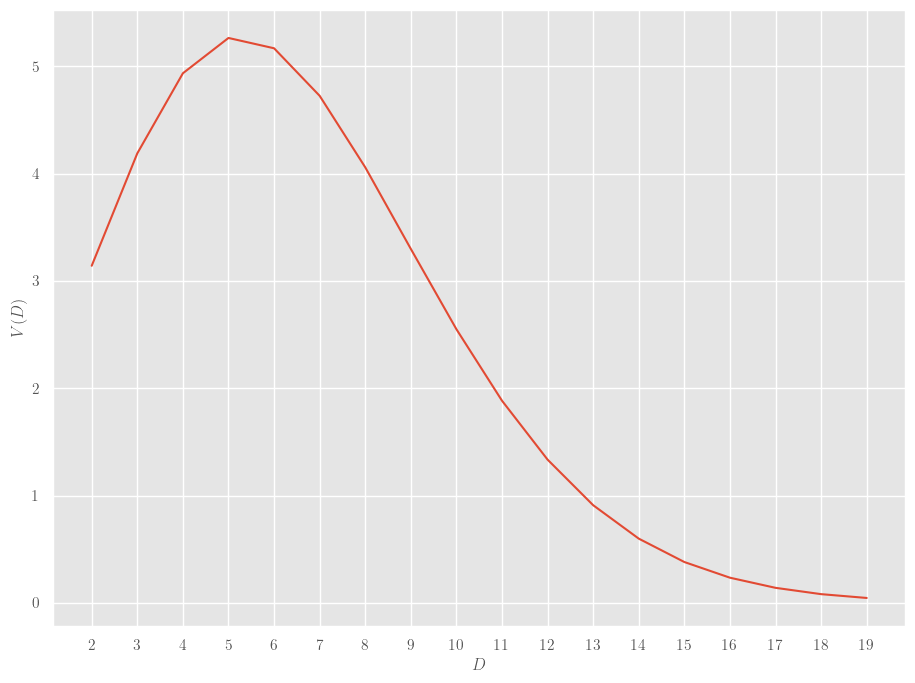

In [85]:
print(r'V(2) = pi*{a}'.format(a=getSphereVolumeExact(2)/np.pi))
print(r'V(3) = pi*{a}'.format(a=getSphereVolumeExact(3)/np.pi))
d_ = np.arange(2, 20)

plt.plot(d_, getSphereVolumeExact(d_))
plt.ylabel('$V(D)$')
plt.xlabel('$D$')
plt.xticks(d_)
plt.show()

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [86]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """

    p_ = np.random.uniform(low = -R, high = R, size = (N, D))
    N_in = np.count_nonzero([np.linalg.norm(p_[i]) < R for i in range(N)])
    V_square = (2 * R) ** D
    V = N_in / N * V_square

    return V


Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

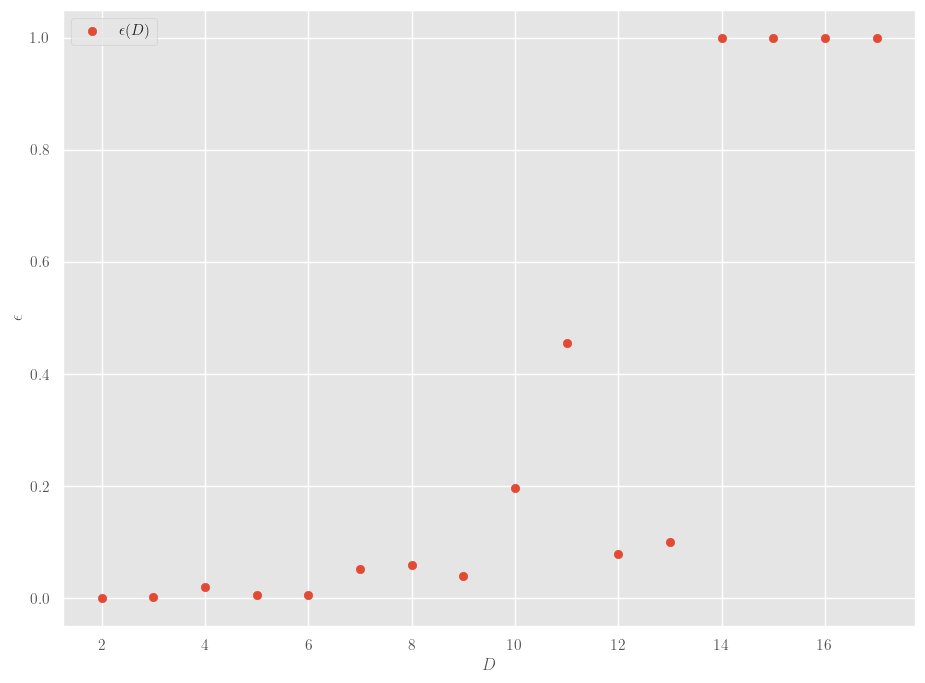

In [87]:
N = 10000
d_ = np.arange(2, 18)
eps_ = []

for d in d_:
    eps = abs(1 - getSphereVolumePseudorandom(N, d) / getSphereVolumeExact(d))
    eps_.append(eps)

plt.xlabel('$D$')
plt.ylabel(r'$\epsilon$')
plt.scatter(d_, eps_, label=r'$\epsilon(D)$')
plt.legend()
plt.show()

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [88]:
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [89]:
sobol_seq.i4_sobol_generate?

In [90]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    p_ = sobol_seq.i4_sobol_generate(D, N)
    N_in = np.count_nonzero([np.linalg.norm(p_[i]) < R for i in range(N)])
    V_square = (2 * R) ** D
    V = N_in / N * V_square

    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

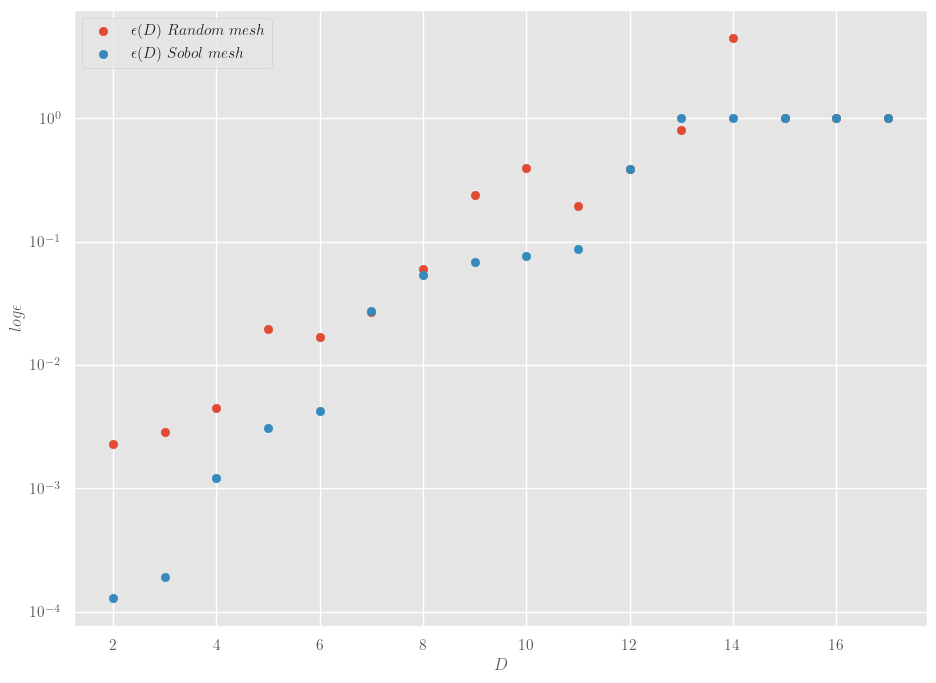

In [91]:
N = 10000
d_ = np.arange(2, 18)
eps_, epsSobol_ = [], []

for d in d_:
    V_exact = getSphereVolumeExact(d)
    eps = abs(1 - getSphereVolumePseudorandom(N, d) / V_exact)
    eps_.append(eps)

    epsSobol = abs(1 - getSphereVolumeQuasirandom(N, d) / V_exact)
    epsSobol_.append(epsSobol)
plt.xlabel('$D$')
plt.ylabel(r'$log \epsilon$')
plt.yscale('log')
plt.scatter(d_, eps_, label=r'$\epsilon (D)~Random~mesh$')
plt.scatter(d_, epsSobol_, label=r'$\epsilon (D)~Sobol~mesh$')
plt.legend()
plt.show()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Квази случайная генерация точек более плотно заполняет пространство и, соответственно дает более высокую точность на малых D,
с большей надежностью.

# Задание 2

## Задание 2.1
Вычислите значение интеграла 
$$\int d^d\mathbf{r} \frac{e^{-\mathbf{r}^T\mathbf{r}}}{1 + \mathbf{r}^T\mathbf{r}}, \;\mathbf{r} = (r_1, r_2, ..., r_d)$$
по всему пространству, используя генерацию случайной величины с гауссовой плотностью.
Проведите результаты для $d=1,2,3,4,5$, используя разумной количество точек.
Для $d=1,2$ сравните с ответом, полученным \textit{любым} другим способом.

In [92]:
def func(r):
    return 1 / (1 + (r ** 2).sum())

f1 = lambda x: np.e ** (-x ** 2) / (1 + x ** 2)
f2 = lambda x, y: np.e ** (-x ** 2 - y ** 2) / (1 + x ** 2 + y ** 2)

N = 50000
print(f'N = {N}')
for d in [1, 2, 3, 4, 5]:
    p_ =  np.random.normal(0, 1 / np.sqrt(2), size=(N, d))
    ans = np.pi ** (d/2) * np.array([func(p) for p in p_]).sum() / N

    print(f'd = {d}: I = {ans}')



print(f'Scipy integrate.quad (d = 1): I = {integrate.quad(f1, -np.inf, np.inf)[0]}')
print(f'Scipy integrate.dblquad (d = 2): I = {integrate.dblquad(f2, -np.inf, np.inf, -np.inf, np.inf)[0]}')

N = 50000
d = 1: I = 1.3438396172953733
d = 2: I = 1.8715221848372061
d = 3: I = 2.7032448673337837
d = 4: I = 3.9857818720543827
d = 5: I = 6.026983015251746
Scipy integrate.quad (d = 1): I = 1.3432934216467354
Scipy integrate.dblquad (d = 2): I = 1.873480492462358


## Задание 2.2
Реализуйте функцию, возвращающую выборку случайной величины с плотностью $\omega(x) \propto \sqrt{1-x^2}, x\in[-1,1]$, используя rejection method.

In [93]:
def getSample(N):
    """
    Функция возвращает выборку случайных величин с распределнием ~sqrt(1-x^2) 

    --------
    Аргументы:
    N - int, количество случайных точек
    --------
    Функция возвращает:
    sample - numpy ndarray of float, массив случайных величин размера N
    """
    pdf = lambda x: np.sqrt(1 - x ** 2)
    sample, k=[], 0
    while k < N:
        x=np.random.uniform(-1,1)
        y=np.random.uniform(0,1)
        if y < pdf(x):
           sample.append(x)
           k+=1

    return sample

Проверьте правильность, сгенерировав достаточно большой sample, и построив гистограмму.

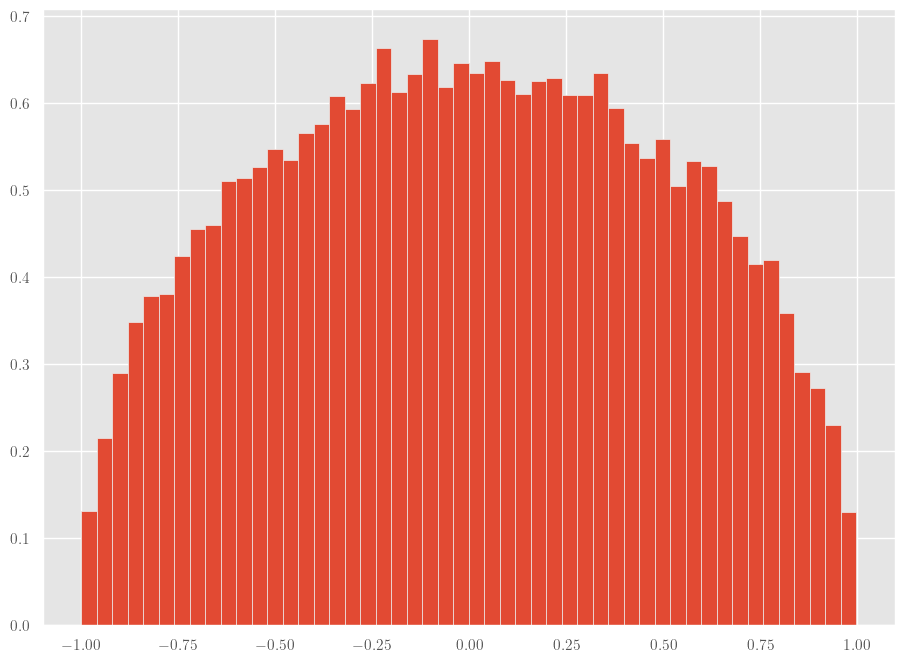

In [94]:
plt.hist(getSample(50000), 50, density=True)
plt.show()

# Задание 3

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$E_i = -J \sigma_i \sigma_j$$
Тогда энергия каждой ячейки 
$$E_i = -J \sigma_i \sum_j \sigma_j$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [95]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = np.random.randint(2, size=(N, N))
    state[np.where(state == 0)] = -1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [96]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = len(state)
    i_down, i_up = (i - 1) % N, (i + 1) % N
    j_down, j_up = (j - 1) % N, (j + 1) % N
    E = -state[i][j] * (state[i_down][j] + state[i_up][j] + state[i][j_down] + state[i][j_up])
    dE = - float(2 * E)
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [97]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = len(state)
    i_ = np.random.randint(0, N, (1, N**2))[0]
    j_ = np.random.randint(0, N, (1, N**2))[0]
    for t in range(N ** 2):
        i, j = i_[t], j_[t]
        dE = getDeltaE(i, j, state)
        if dE <= 0:
            state[i][j] *= -1
        else:
            if np.random.uniform(0, 1) <= np.e ** (-dE / T):
                state[i][j] *= -1
            else:
                pass
    return state
# state = getInitialState(15)
# print(state)
# print(makeFlip(10, state))

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [98]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''

    N, E = len(state), 0
    for i in range(N):
        for j in range(N):
            i_down, i_up = (i - 1) % N, (i + 1) % N
            j_down, j_up = (j - 1) % N, (j + 1) % N
            E += -state[i][j] * (state[i_down][j] + state[i_up][j] + state[i][j_down] + state[i][j_up])

    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [99]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = state.sum()
    return M
# _ = getInitialState(3)
# print(_)
# _ = getMagnetization(_)
# print(_)

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [105]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

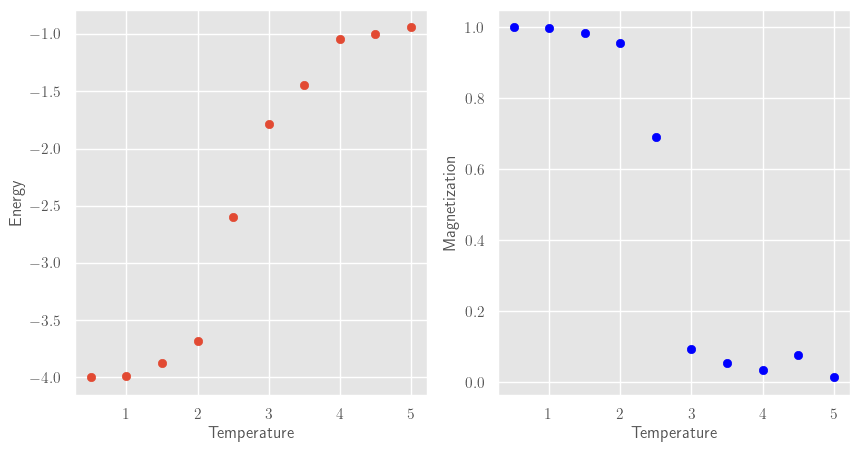

In [106]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Как знаем из домашек по термодинамике энергию можно приблизить
формулой $E = -A(N_{\downarrow}-N_{\uparrow})^2$. Чем больше температура
тем беспорядочнее направление спинов и $E,M \rightarrow 0$.
На графиках также можем наблюдать ферромагнитный переход, при котором
$\langle N_{\downarrow}-N_{\uparrow}\rangle \sim 0$

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

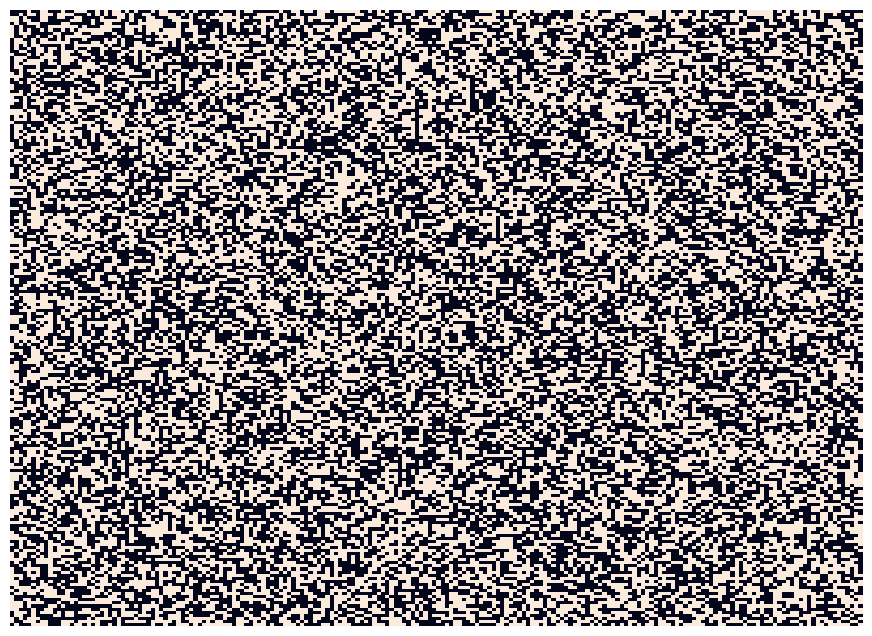

In [102]:
N = 200
state = getInitialState(N)
sns.heatmap(state, cbar=False, yticklabels=False, xticklabels=False)
plt.show()

<Figure size 1100x800 with 0 Axes>

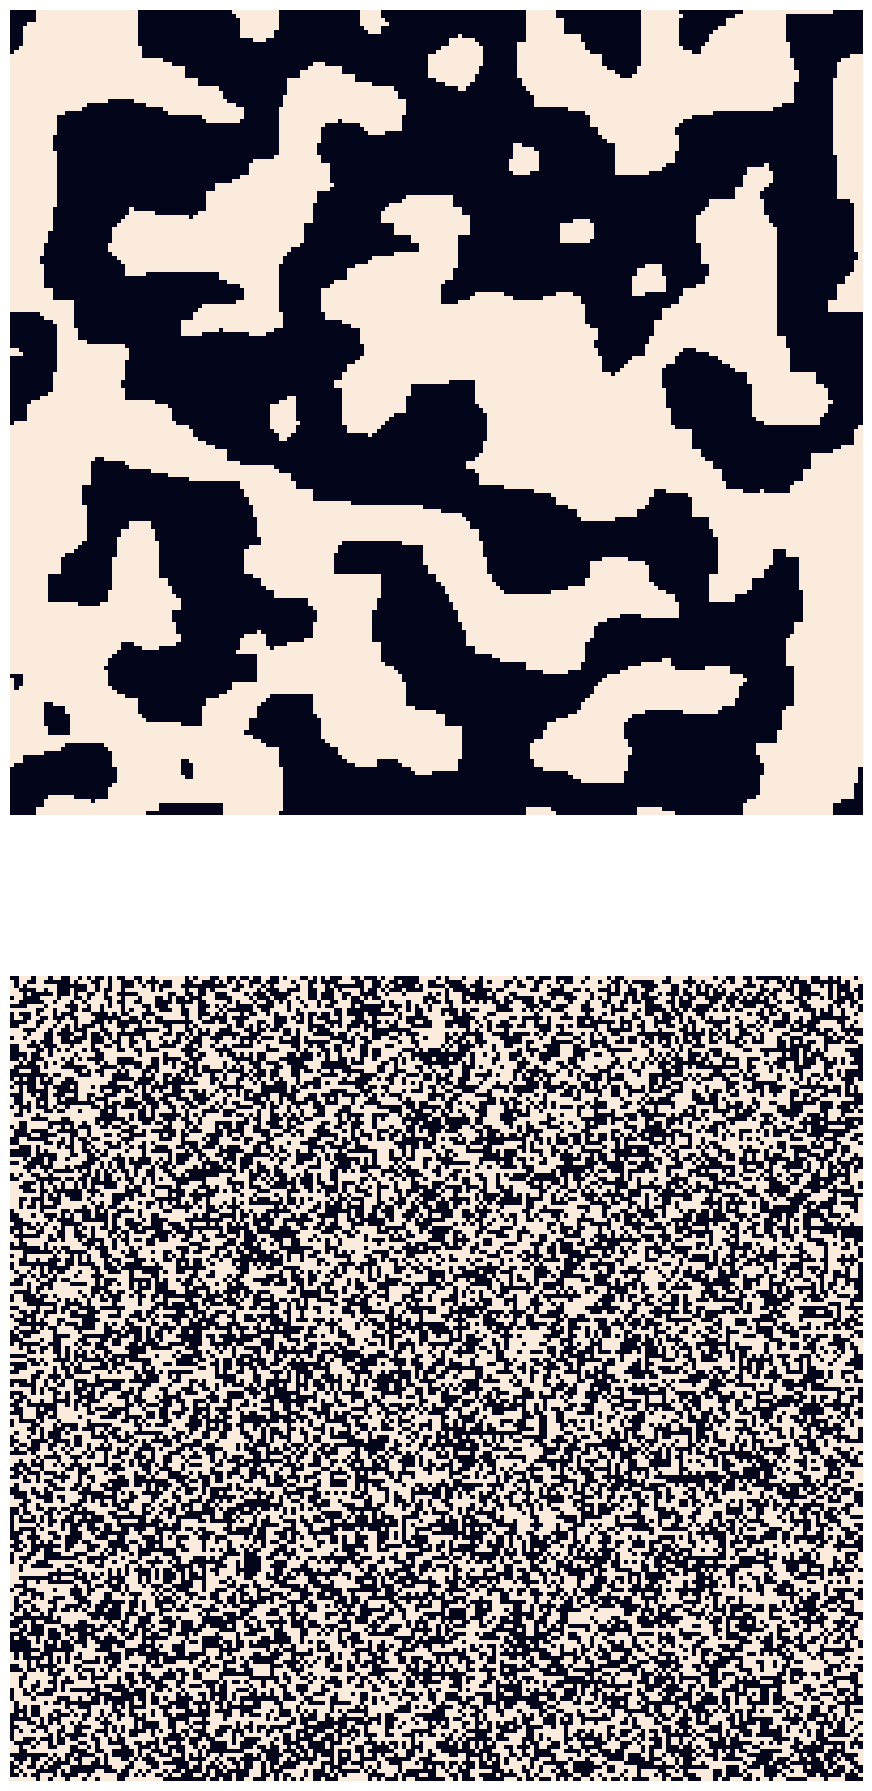

In [103]:
plt.figure()
fig, ax =plt.subplots(2, figsize=(11, 23))
state_high = getInitialState(N)
state_low = getInitialState(N)
for _ in range(40):
    state_low = makeFlip(0.01, state_low)
for _ in range(10):
    state_high = makeFlip(20, state_high)
sns.heatmap(state_low, ax=ax[0], cbar=False, yticklabels=False, xticklabels=False)
sns.heatmap(state_high, ax=ax[1], cbar=False, yticklabels=False, xticklabels=False)

plt.show()

Наблюдаем кластеризацию на низких температурах и беспорядочность на высоких. Очень красиво!!!